In [15]:
import time
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.patches import Circle
from IPython.display import clear_output


For a simple pendulum of mass $m$ and length $l$,

$$T = \frac{1}{2} m l^2 \dot{\theta}^2, \quad U = m g l (1 - \cos\theta)$$

So the **Lagrangian** is

$$L = T - U = \frac{1}{2} m l^2 \dot{\theta}^2 - m g l (1 - \cos\theta)$$

Lagrange’s equation:

$$\frac{d}{dt} \frac{\partial L}{\partial \dot{\theta}} - \frac{\partial L}{\partial \theta} = 0$$

This gives,

$$m l^2 \ddot{\theta} + m g l \sin\theta = 0$$

or

$$\ddot{\theta} + \frac{g}{l} \sin\theta = 0$$

In [16]:
t = sp.Symbol('t')
m, g, l = sp.symbols('m g l', positive=True)
theta = sp.Function('theta')(t)
T = (1/2) * m * l**2 * sp.diff(theta, t)**2
U = m * g * l * (1 - sp.cos(theta))
L = T - U
dL_dtheta = sp.diff(L, theta)
dL_dthetadot = sp.diff(L, sp.diff(theta, t))
eq = sp.diff(dL_dthetadot, t) - dL_dtheta 
eq = eq/(m * l**2)
eq_simplified = sp.Eq(sp.simplify(eq), 0)
print("Lagrange’s Equation:")
display(eq_simplified)

Lagrange’s Equation:


Eq(g*sin(theta(t))/l + 1.0*Derivative(theta(t), (t, 2)), 0)

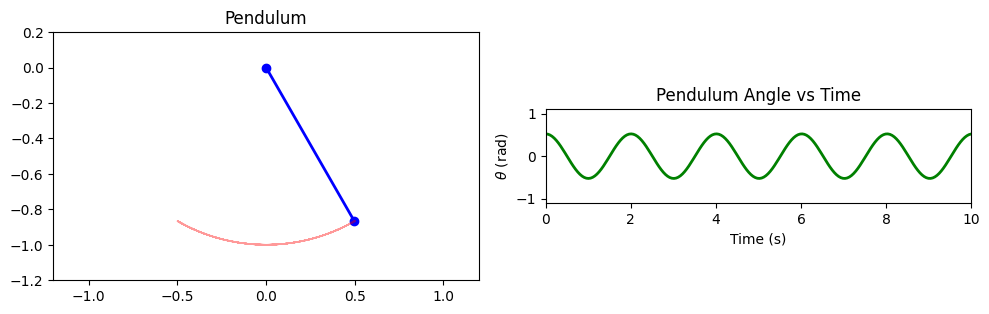

In [17]:
g = 9.81
l = 1.0
theta0 = np.radians(30)
omega = np.sqrt(g / l)
t_vals = np.linspace(0, 10, 200)
theta_vals = theta0 * np.cos(omega * t_vals)
x_vals = l * np.sin(theta_vals)
y_vals = -l * np.cos(theta_vals)

for i in range(len(t_vals)):
    clear_output(wait=True)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.set_xlim(-1.2*l, 1.2*l)
    ax1.set_ylim(-1.2*l, 0.2*l)
    ax1.set_aspect('equal')  # ensure square aspect
    ax1.plot(0, 0, 'ko', markersize=5)  # pivot
    ax1.plot([0, x_vals[i]], [0, y_vals[i]], 'o-', lw=2, color='blue')
    ax1.plot(x_vals[:i+1], y_vals[:i+1], '-', lw=1, color='red', alpha=0.4)
    ax1.set_title("Pendulum")
    
    ax2.set_xlim(0, 10)
    ax2.set_ylim(-1.1*l, 1.1*l)  # same height as pendulum for equal size
    ax2.set_aspect('equal')       # make width/height ratio equal
    ax2.plot(t_vals[:i+1], theta_vals[:i+1], color='green', lw=2)
    ax2.set_title("Pendulum Angle vs Time")
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel(r"$\theta$ (rad)")
    
    plt.tight_layout()
    plt.show()
    time.sleep(0.05)


In [8]:
theta = sp.symbols('theta')   # generalized coordinate
l = sp.symbols('l', positive=True)  # pendulum length

# Position of single pendulum bob (2D)
x = l * sp.sin(theta)
y = -l * sp.cos(theta)

print("Single pendulum position in terms of generalized coordinate θ:")
display(sp.Matrix([x, y]))
print("\n")

theta1, theta2 = sp.symbols('theta1 theta2')
l1, l2 = sp.symbols('l1 l2', positive=True)

# Positions of the two bobs
r1 = sp.Matrix([l1*sp.sin(theta1), -l1*sp.cos(theta1)])
r2 = sp.Matrix([ l1*sp.sin(theta1) + l2*sp.sin(theta2),
                -l1*sp.cos(theta1) - l2*sp.cos(theta2) ])

print("Double pendulum positions in terms of generalized coordinates θ1, θ2:")
print("r1 (top bob):")
display(r1)
print("r2 (bottom bob):")
display(r2)
print("\n")

a, t = sp.symbols('a t')  # car acceleration and time

# Position of bob in inertial frame
r_car = sp.Matrix([l*sp.sin(theta) + 0.5*a*t**2, -l*sp.cos(theta)])

print("Single pendulum on accelerating car:")
display(r_car)


Single pendulum position in terms of generalized coordinate θ:


Matrix([
[ l*sin(theta)],
[-l*cos(theta)]])



Double pendulum positions in terms of generalized coordinates θ1, θ2:
r1 (top bob):


Matrix([
[ l1*sin(theta1)],
[-l1*cos(theta1)]])

r2 (bottom bob):


Matrix([
[ l1*sin(theta1) + l2*sin(theta2)],
[-l1*cos(theta1) - l2*cos(theta2)]])



Single pendulum on accelerating car:


Matrix([
[0.5*a*t**2 + l*sin(theta)],
[            -l*cos(theta)]])

the Lagrangian is

$\mathcal{L}=T-V$

Lagrangian is expressed in terms of a single generalized coordinate $q$ and its time derivative $\dot{q}$, in the form

$\mathcal{L}=\mathcal{L}(q,\dot{q})$

$\displaystyle\frac{\partial \mathcal{L}}{\partial q}=\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{q}}$

If we choose the angle $\phi$ as our generalized coordinate, then Lagrange's equation reads

$\displaystyle\frac{\partial \mathcal{L}}{\partial \phi}=\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{\phi}}$

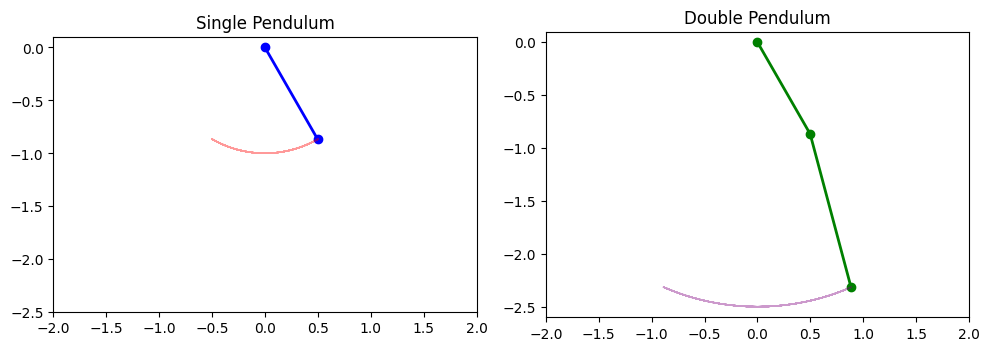

In [9]:
l1 = 1.0      # length of top pendulum
l2 = 1.5      # length of bottom pendulum (for double pendulum)
theta0 = np.radians(30)  # initial angle in radians
g = 9.81
omega = np.sqrt(g/l1)
t_vals = np.linspace(0, 10, 300)

# Single pendulum
theta = theta0 * np.cos(omega * t_vals)

# Double pendulum (simple small-angle approximation)
theta1 = theta0 * np.cos(omega * t_vals)
theta2 = theta0/2 * np.cos(omega * t_vals)  # just for demonstration

# Positions
# Single pendulum
x_single = l1 * np.sin(theta)
y_single = -l1 * np.cos(theta)

# Double pendulum
x1 = l1 * np.sin(theta1)
y1 = -l1 * np.cos(theta1)
x2 = l1*np.sin(theta1) + l2*np.sin(theta2)
y2 = -l1*np.cos(theta1) - l2*np.cos(theta2)

for i in range(len(t_vals)):
    clear_output(wait=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    
    # --- Single pendulum ---
    ax[0].set_xlim(-2, 2)
    ax[0].set_ylim(-2.5, 0.1)
    ax[0].set_aspect('equal')
    ax[0].plot(0, 0, 'ko', markersize=5)
    ax[0].plot([0, x_single[i]], [0, y_single[i]], 'o-', lw=2, color='blue')
    ax[0].plot(x_single[:i+1], y_single[:i+1], '-', lw=1, color='red', alpha=0.4)
    ax[0].set_title("Single Pendulum")
    
    # --- Double pendulum ---
    ax[1].set_xlim(-2, 2)
    ax[1].set_ylim(-2.6, 0.1)
    ax[1].set_aspect('equal')
    ax[1].plot(0, 0, 'ko', markersize=5)
    ax[1].plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], 'o-', lw=2, color='green')
    ax[1].plot(x2[:i+1], y2[:i+1], '-', lw=1, color='purple', alpha=0.4)
    ax[1].set_title("Double Pendulum")
    
    plt.tight_layout()
    plt.show()
    time.sleep(0.05)


### **Double Pendulum: Lagrangian Formulation**

The two degrees of freedom are taken to be $\theta_1$ and $\theta_2$,
the angles of each pendulum rod from the vertical.


### **Coordinates and Velocities**

$$
\begin{aligned}
x_1 &= l_1 \sin\theta_1, &\quad \dot{x}_1 &= l_1 \dot{\theta}_1 \cos\theta_1,\\
y_1 &= -l_1 \cos\theta_1, &\quad \dot{y}_1 &= l_1 \dot{\theta}_1 \sin\theta_1, \\
x_2 &= l_1 \sin\theta_1 + l_2 \sin\theta_2, &\quad \dot{x}_2 &= l_1 \dot{\theta}_1 \cos\theta_1 + l_2 \dot{\theta}_2 \cos\theta_2,\\
y_2 &= -l_1 \cos\theta_1 - l_2 \cos\theta_2, &\quad \dot{y}_2 &= l_1 \dot{\theta}_1 \sin\theta_1 + l_2 \dot{\theta}_2 \sin\theta_2.
\end{aligned}
$$

### **Potential and Kinetic Energies**

$$
\begin{aligned}
V &= m_1 g y_1 + m_2 g y_2 = - (m_1 + m_2) l_1 g \cos\theta_1 - m_2 l_2 g \cos\theta_2,
\end{aligned}
$$

$$
\begin{aligned}
T &= \tfrac{1}{2} m_1 v_1^2 + \tfrac{1}{2} m_2 v_2^2 \\
&= \tfrac{1}{2} m_1 (\dot{x}_1^2 + \dot{y}_1^2) + \tfrac{1}{2} m_2 (\dot{x}_2^2 + \dot{y}_2^2)\\
  &= \tfrac{1}{2} m_1 l_1^2 \dot{\theta}_1^2 + \tfrac{1}{2} m_2 \left[ l_1^2 \dot{\theta}_1^2 + l_2^2 \dot{\theta}_2^2 + 2 l_1 l_2 \dot{\theta}_1 \dot{\theta}_2 \cos(\theta_1 - \theta_2) \right].
  \end{aligned}
$$

### **Lagrangian**

$$\begin{aligned}
L &= T - V \\
&= \tfrac{1}{2}(m_1 + m_2)l_1^2 \dot{\theta}_1^2 + \tfrac{1}{2} m_2 l_2^2 \dot{\theta}_2^2 + m_2 l_1 l_2 \dot{\theta}_1 \dot{\theta}_2 \cos(\theta_1 - \theta_2) + (m_1 + m_2) l_1 g \cos\theta_1 + m_2 g l_2 \cos\theta_2.
  \end{aligned}
$$

### **Euler–Lagrange Equations**

For each generalized coordinate $ q_i = \theta_1, \theta_2 $ :

$$\frac{d}{dt}\!\left(\frac{\partial L}{\partial \dot{q}_i}\right)- \frac{\partial L}{\partial q_i} = 0$$

That is,

$$\frac{d}{dt}\!\left(\frac{\partial L}{\partial \dot{\theta}_1}\right)- \frac{\partial L}{\partial \theta_1} = 0,   \qquad
  \frac{d}{dt}\!\left(\frac{\partial L}{\partial \dot{\theta}_2}\right)- \frac{\partial L}{\partial \theta_2} = 0  $$


### **Equations of Motion**

For the double pendulum, after simplification, we obtain:


$$(m_1 + m_2) l_1 \ddot{\theta}_1 + m_2 l_2 \ddot{\theta}_2 \cos(\theta_1 - \theta_2) + m_2 l_2 \dot{\theta}_2^2 \sin(\theta_1 - \theta_2) + (m_1 + m_2) g \sin\theta_1 = 0,$$

$$m_2 l_2 \ddot{\theta}_2 + m_2 l_1 \ddot{\theta}_1 \cos(\theta_1 - \theta_2) - m_2 l_1 \dot{\theta}_1^2 \sin(\theta_1 - \theta_2) + m_2 g \sin\theta_2 = 0$$

Re-arranging ,

$$(m_1 + m_2) l_1 \ddot{\theta}_1 + m_2 l_2 \ddot{\theta}_2 \cos(\theta_1 - \theta_2) = - m_2 l_2 \dot{\theta}_2^2 \sin(\theta_1 - \theta_2) - (m_1 + m_2) g \sin\theta_1 ,$$

$$ m_2 l_1 \ddot{\theta}_1 \cos(\theta_1 - \theta_2) + m_2 l_2 \ddot{\theta}_2  = - m_2 l_1 \dot{\theta}_1^2 \sin(\theta_1 - \theta_2) - m_2 g \sin\theta_2 $$

### Matrix form $AX=B$

$$ A=\begin{pmatrix} a & b \\ c & d \end{pmatrix} = \begin{pmatrix} (m_1+m_2)l_1 & m_2 l_2\cos\Delta \\  m_2 l_1\cos\Delta & m_2 l_2 \end{pmatrix}$$,

and

$$\mathbf{\ddot\theta}=\begin{pmatrix}\ddot\theta_1 \\ \ddot\theta_2\end{pmatrix},\qquad \mathbf{B}=\begin{pmatrix} - m_2 l_2 z_2^{2}\sin\Delta - (m_1+m_2)g\sin\theta_1  \\   m_2 l_1 z_1^{2}\sin\Delta - m_2 g\sin\theta_2  \end{pmatrix}$$

where,

$\qquad \displaystyle\Delta = (\theta_1 - \theta_2) $

#### Determinant of $A$


$$\begin{aligned}
\det A &= a d - b c \\
&= (m_1+m_2)l_1\cdot m_2 l_2 - (m_2 l_2\cos\Delta),(m_2 l_1\cos\Delta) \\
&= m_2 l_1 l_2\big[(m_1+m_2) - m_2\cos^2\Delta\big] \\
&= m_2 l_1 l_2\big[m_1 + m_2(1-\cos^2\Delta)\big] \\
&= m_2 l_1 l_2\big[m_1 + m_2\sin^2\Delta\big].
\end{aligned}$$

#### Solve by Cramer’s rule

**For $\ddot\theta_1$**:

$$\ddot\theta_1 = \frac{d\cdot b_1 - b\cdot b_2}{\det A}$$

where $b_1$ and $b_2$ are the components of $\mathbf B$.

Compute the numerator $N_1$,

$$\begin{aligned}
N_1 &= d,b_1 - b,b_2 \\
&= m_2 l_2\big(- m_2 l_2 z_2^{2}\sin\Delta - (m_1+m_2)g\sin\theta_1\big) - m_2 l_2\cos\Delta\big(m_2 l_1 z_1^{2}\sin\Delta - m_2 g\sin\theta_2\big) \\
  &= -m_2^2 l_2^2 z_2^{2}\sin\Delta - m_2 l_2(m_1+m_2)g\sin\theta_1 - m_2^2 l_1 l_2 z_1^{2}\sin\Delta\cos\Delta + m_2^2 l_2 g\sin\theta_2\cos\Delta \\
    &= m_2 l_2\left[-m_2 l_2 z_2^{2}\sin\Delta - (m_1+m_2)g\sin\theta_1 - m_2 l_1 z_1^{2}\sin\Delta\cos\Delta + m_2 g\sin\theta_2\cos\Delta\right].
  \end{aligned}$$

Factor $m_2 l_2$ from $N_1$ and cancel with $\det A$ (which contains $m_2 l_1 l_2$),

$$\ddot\theta_1 = \frac{-m_2 l_1 z_1^{2}\sin\Delta\cos\Delta - m_2 l_2 z_2^{2}\sin\Delta + m_2 g\sin\theta_2\cos\Delta - (m_1+m_2)g\sin\theta_1}{l_1\big(m_1 + m_2\sin^2\Delta\big)}$$

Rearrange and factor $-m_2\sin\Delta$ in the kinetic terms to get the standard compact form:

$$\boxed{\, \ddot\theta_1 \;=\; \frac{\,m_2 g\sin\theta_2\cos\Delta - m_2\sin\Delta\big(l_1 z_1^{2}\cos\Delta + l_2 z_2^{2}\big) - (m_1+m_2)g\sin\theta_1\,}   {\,l_1\big(m_1 + m_2\sin^2\Delta\big)\,}\, }$$


**For $\ddot\theta_2$**:

$$\ddot\theta_2 = \frac{-c\cdot b_1 + a\cdot b_2}{\det A}$$

Compute numerator $N_2$,

$$\begin{aligned}
N_2 &= -m_2 l_1\cos\Delta\big(- m_2 l_2 z_2^{2}\sin\Delta - (m_1+m_2)g\sin\theta_1\big) + (m_1+m_2)l_1\big(m_2 l_1 z_1^{2}\sin\Delta - m_2 g\sin\theta_2\big) \\ 
  &= m_2^2 l_1 l_2 z_2^{2}\sin\Delta\cos\Delta + m_2 l_1(m_1+m_2)g\sin\theta_1\cos\Delta + (m_1+m_2)m_2 l_1^2 z_1^{2}\sin\Delta - (m_1+m_2)m_2 l_1 g\sin\theta_2  \\
  &= m_2 l_1 \left[m_2 l_2 z_2^{2}\sin\Delta\cos\Delta + (m_1+m_2)g\sin\theta_1\cos\Delta + (m_1+m_2)l_1 z_1^{2}\sin\Delta - (m_1+m_2) g\sin\theta_2 \right].   \end{aligned}$$

Factor $m_2 l_1$ and cancel with $\det A$ (which contains $m_2 l_1 l_2$),

$$\ddot\theta_2 = \frac{\,m_2 l_2 z_2^{2}\sin\Delta\cos\Delta + (m_1+m_2)l_1 z_1^{2}\sin\Delta + (m_1+m_2)g\sin\theta_1\cos\Delta - (m_1+m_2)g\sin\theta_2\,} {\,l_2\big(m_1 + m_2\sin^2\Delta\big)\,}.$$

Rewriting the numerator in grouped form yields the usual compact expression:

$$\boxed{\,\ddot\theta_2 \;=\; \frac{\, (m_1+m_2)\big(l_1 z_1^{2}\sin\Delta - g\sin\theta_2 + g\sin\theta_1\cos\Delta\big) + m_2 l_2 z_2^{2}\sin\Delta\cos\Delta \,} {\,l_2\big(m_1 + m_2\sin^2\Delta\big)\,}\, }$$


### **Conversion to First-Order System**

 we rewrite the system as first-order ODEs.
Let:

$$
z_1 \equiv \dot{\theta}_1 \quad \Rightarrow \quad \ddot{\theta}_1 = \dot{z}_1,$$

$$
z_2 \equiv \dot{\theta}_2 \quad \Rightarrow \quad \ddot{\theta}_2 = \dot{z}_2$$


After rearranging and simplifying, we obtain:


$$\boxed{\begin{aligned}\dot{z}_1 &= \frac{ m_2 g \sin\theta_2 \cos(\theta_1 - \theta_2) - m_2 \sin(\theta_1 - \theta_2) \left[ l_1 z_1^2 \cos(\theta_1 - \theta_2) + l_2 z_2^2   \right] - (m_1 + m_2) g \sin\theta_1 }{l_1 \left[m_1 + m_2 \sin^2(\theta_1 - \theta_2)\right] } \\
\dot{z}_2 &=\frac{(m_1 + m_2)\left[l_1 z_1^2 \sin(\theta_1 - \theta_2) - g \sin\theta_2 + g \sin\theta_1 \cos(\theta_1 - \theta_2) \right] + m_2 l_2 z_2^2 \sin(\theta_1 - \theta_2) \cos(\theta_1 - \theta_2) }{l_2 \left[m_1 + m_2 \sin^2(\theta_1 - \theta_2)\right] } \end{aligned}}$$



In [4]:
t = sp.symbols('t')
m1, m2, l1, l2, g = sp.symbols('m1 m2 l1 l2 g')
phi1 = sp.Function('phi1')(t)
phi2 = sp.Function('phi2')(t)

phi1_dot = phi1.diff(t)
phi2_dot = phi2.diff(t)

x1 =  l1 * sp.sin(phi1)
y1 = -l1 * sp.cos(phi1)

x2 = x1 + l2 * sp.sin(phi2)
y2 = y1 - l2 * sp.cos(phi2)

x1_dot = x1.diff(t)
y1_dot = y1.diff(t)

x2_dot = x2.diff(t)
y2_dot = y2.diff(t)

T = (1/2)*m1*(x1_dot**2 + y1_dot**2) + (1/2)*m2*(x2_dot**2 + y2_dot**2)
V = m1*g*y1 + m2*g*y2
L = T - V

print('T')
display(sp.simplify(T))
print('V')
display(sp.simplify(V))
print('L')
display(sp.simplify(L))

def EL_eq(L, q):
    return sp.simplify(sp.diff(sp.diff(L, q.diff(t)), t) - sp.diff(L, q))


eq1 = EL_eq(L, phi1)
eq2 = EL_eq(L, phi2)
print('dL_dphi1')
display(sp.simplify(eq1))
print('dL_dphi2')
display(sp.simplify(eq2))

sol = sp.solve([eq1, eq2], (phi1.diff(t,2), phi2.diff(t,2)), simplify=True, rational=True)
phi1_ddot_expr = sp.simplify(sol[phi1.diff(t,2)])
phi2_ddot_expr = (sp.simplify(sol[phi2.diff(t,2)])).evalf()

print("dz1 =")
display(phi1_ddot_expr)
print("dz2 =")
display(phi2_ddot_expr)

T


0.5*l1**2*m1*Derivative(phi1(t), t)**2 + 0.5*m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)

V


-g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t)))

L


g*l1*m1*cos(phi1(t)) + g*m2*(l1*cos(phi1(t)) + l2*cos(phi2(t))) + 0.5*l1**2*m1*Derivative(phi1(t), t)**2 + 0.5*m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)

dL_dphi1


l1*(g*m1*sin(phi1(t)) + g*m2*sin(phi1(t)) + l1*m1*Derivative(phi1(t), (t, 2)) + l1*m2*Derivative(phi1(t), (t, 2)) + l2*m2*sin(phi1(t) - phi2(t))*Derivative(phi2(t), t)**2 + l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi2(t), (t, 2)))

dL_dphi2


l2*m2*(g*sin(phi2(t)) - l1*sin(phi1(t) - phi2(t))*Derivative(phi1(t), t)**2 + l1*cos(phi1(t) - phi2(t))*Derivative(phi1(t), (t, 2)) + l2*Derivative(phi2(t), (t, 2)))

dz1 =


(-g*m1*sin(phi1(t)) - g*m2*sin(phi1(t) - 2*phi2(t))/2 - g*m2*sin(phi1(t))/2 - l1*m2*sin(2*phi1(t) - 2*phi2(t))*Derivative(phi1(t), t)**2/2 - l2*m2*sin(phi1(t) - phi2(t))*Derivative(phi2(t), t)**2)/(l1*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

dz2 =


0.5*(g*m1*sin(2*phi1(t) - phi2(t)) - g*m1*sin(phi2(t)) + g*m2*sin(2*phi1(t) - phi2(t)) - g*m2*sin(phi2(t)) + 2.0*l1*m1*sin(phi1(t) - phi2(t))*Derivative(phi1(t), t)**2 + 2.0*l1*m2*sin(phi1(t) - phi2(t))*Derivative(phi1(t), t)**2 + l2*m2*sin(2*phi1(t) - 2*phi2(t))*Derivative(phi2(t), t)**2)/(l2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

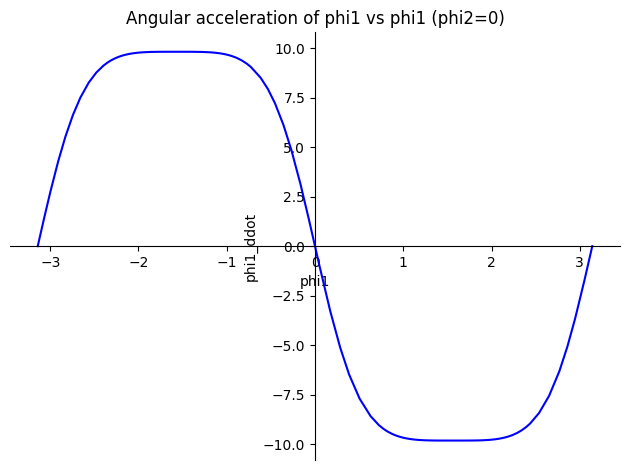

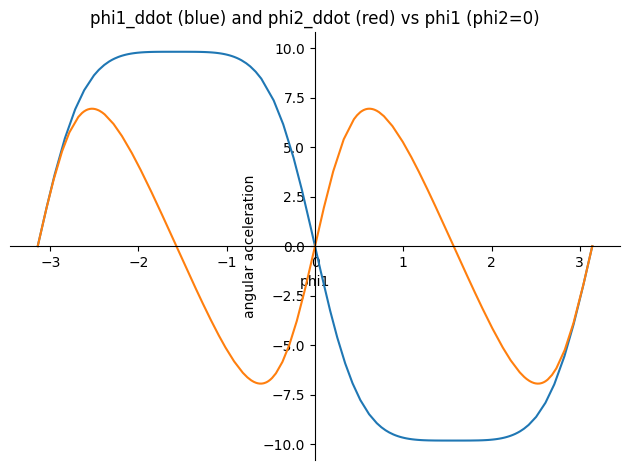

In [21]:
subs_vals = { 
    m1: 1,
    m2: 1,
    l1: 1,
    l2: 1,
    g: 9.81
}
phi1_sym, phi2_sym = sp.symbols('phi1_sym phi2_sym')
theta_diff = phi1_sym - phi2_sym
phi1_ddot_num = phi1_ddot_expr.subs({
    phi1: phi1_sym,
    phi2: phi2_sym,
    phi1.diff(t): 0,
    phi2.diff(t): 0,
    **subs_vals
})
phi1_ddot_num = sp.simplify(phi1_ddot_num)
from sympy.plotting import plot

plot(phi1_ddot_num.subs(phi2_sym, 0), (phi1_sym, -sp.pi, sp.pi),
     title="Angular acceleration of phi1 vs phi1 (phi2=0)",
     ylabel="phi1_ddot",
     xlabel="phi1",
     line_color='blue')
phi2_ddot_num = phi2_ddot_expr.subs({
    phi1: phi1_sym,
    phi2: phi2_sym,
    phi1.diff(t): 0,
    phi2.diff(t): 0,
    **subs_vals
})

plot(
    phi1_ddot_num.subs(phi2_sym, 0),
    phi2_ddot_num.subs(phi2_sym, 0),
    (phi1_sym, -sp.pi, sp.pi),
    title="phi1_ddot (blue) and phi2_ddot (red) vs phi1 (phi2=0)",
    ylabel="angular acceleration",
    xlabel="phi1",
    show=True
)


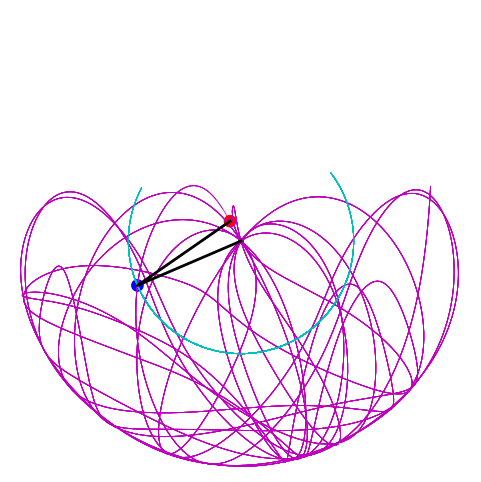

In [18]:
L1, L2 = 1, 1
m1_val, m2_val = 1, 1
g_val = 9.81
tmax, dt = 25, 0.01
t_span = np.arange(0, tmax, dt)
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0])        #[np.pi/4, 0, np.pi/3, 0]  # theta1, z1, theta2, z2

def deriv(y, t, L1, L2, m1, m2, g):
    phi1, z1, phi2, z2 = y
    c, s = np.cos(phi1 - phi2), np.sin(phi1 - phi2)
    denom = m1 + m2 * s**2
    
    z1dot = (m2*g*np.sin(phi2)*c - m2*s*(L1*z1**2*c + L2*z2**2) - (m1+m2)*g*np.sin(phi1)) / (L1*denom)
    z2dot = ((m1+m2)*(L1*z1**2*s - g*np.sin(phi2) + g*np.sin(phi1)*c) + m2*L2*z2**2*s*c) / (L2*denom)
    
    return [z1, z1dot, z2, z2dot]

y = odeint(deriv, y0, t_span, args=(L1, L2, m1_val, m2_val, g_val))

phi1_num, phi2_num = y[:,0], y[:,2]
x1_num = L1 * np.sin(phi1_num)
y1_num = -L1 * np.cos(phi1_num)
x2_num = x1_num + L2 * np.sin(phi2_num)
y2_num = y1_num - L2 * np.cos(phi2_num)

r = 0.05
trail_secs = 1
max_trail = int(trail_secs/dt)

for i in range(0, len(t_span), int(0.02/dt)):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6,6))
     
    # Trail
    ns = 20
    s = max_trail//ns
    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0: continue
        imax = imin + s + 1
        alpha = (j/ns)**2
        ax.plot(x2_num[0:imax], y2_num[0:imax], 'm', lw=0.6, alpha=alpha)
        ax.plot(x1_num[0:imax], y1_num[0:imax], 'c', lw=0.6, alpha=alpha)
        #ax.plot(x2_num[imin:imax], y2_num[imin:imax], 'r', lw=2, alpha=alpha)
        #ax.plot(x1_num[imin:imax], y1_num[imin:imax], 'b', lw=2, alpha=alpha)
    
    # Rods
    ax.plot([0, x1_num[i], x2_num[i]], [0, y1_num[i], y2_num[i]], 'k-', lw=2)
    
    # Bobs
    ax.add_patch(Circle((0,0), r/2, fc='k'))
    ax.add_patch(Circle((x1_num[i], y1_num[i]), r, fc='b', ec='b'))
    ax.add_patch(Circle((x2_num[i], y2_num[i]), r, fc='r', ec='r'))
    
    ax.set_xlim(-L1-L2-r, L1+L2+r)
    ax.set_ylim(-L1-L2-r, L1+L2+r)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    plt.show()
    time.sleep(0.01)


# Atwood's machine  


Two masses $m_1$ and $m_2$ connected by an inextensible, massless string over a frictionless massless pulley.                                                
Let $x$ be the downward displacement of $m_1$ from some reference, and because the string length is fixed the downward displacement of $m_2$ is $y$ with

$$x+y=\text{const}\quad\Rightarrow\quad y = \text{const} - x$$

We therefore take $x$ as the single generalized coordinate.

Choose downward positive for $m_1$ and upward positive for $m_2$ (or consistently use downward positive for both with the relation above).

### Kinetic energy

Both masses move with the same speed $|\dot x|$ (string is inextensible). So,

$$T=\tfrac12 m_1 \dot x^2 + \tfrac12 m_2 \dot y^2$$

but $\dot y = -\dot x$ (since $y=$ const $-x$), so $\dot y^2=\dot x^2$. Hence,

$$T=\tfrac12 (m_1+m_2)\dot x^2$$

### Potential energy

Take gravitational potential $U=m g h$ with $h$ vertical coordinate (choose zero conveniently).                                                            
If $x$ is downward for $m_1$ and $y$ downward for $m_2$,

$$U = m_1 g y_1 + m_2 g y_2$$

With signs chosen so that $y_1=x$ and $y_2 = \text{const}-x$, one gets (dropping additive constants)

$$U = m_1 g x + m_2 g(\text{const}-x) = (m_1-m_2) g x + \text{constant}$$

Dropping the constant,

$$U = (m_1-m_2) g x$$

*If you prefer downward positive, check signs consistently; the final dynamics are the same.*

### Lagrangian

$$L = T - U = \tfrac12 (m_1+m_2)\dot x^2 - (m_1-m_2) g x$$

### Euler–Lagrange equation

$$\frac{d}{dt}\Big(\frac{\partial L}{\partial\dot x}\Big) - \frac{\partial L}{\partial x}=0$$

Compute :

$$\frac{\partial L}{\partial \dot x} = (m_1+m_2)\dot x,\qquad
\frac{d}{dt}\Big(\frac{\partial L}{\partial\dot x}\Big)=(m_1+m_2)\ddot x,$$

$$
\frac{\partial L}{\partial x}=-(m_1-m_2)g$$

Therefore

$$(m_1+m_2)\ddot x + (m_1-m_2)g = 0
\quad\Longrightarrow\quad
\ddot x = -\,\frac{m_1-m_2}{m_1+m_2},g$$

If we interpret sign so positive $\ddot x$ means $m_1$ moves downward, the usual form is

$$\boxed{\;\ddot x = \frac{m_1-m_2}{m_1+m_2}\; g\; }$$

*If $m_1>m_2$ the acceleration is downward for $m_1$.*


In [14]:
t = sp.symbols('t')
m1,m2,g = sp.symbols('m1 m2 g', positive=True)
x = sp.Function('x')(t)

T = (1/2)*(m1+m2)*(x.diff(t))**2
U = -(m1-m2)*g*x   # sign depends on your coordinate choice
L = T - U
display(L)
Lxd = sp.diff(L, x.diff(t))
display(Lxd)
Lt  = sp.diff(Lxd, t)
display(Lt)
Lx  = sp.diff(L, x)
display(Lx)
EL = sp.simplify(Lt - Lx)
display(EL)
eq = sp.solve(EL, x.diff(t,2))
display(*eq)

-g*(-m1 + m2)*x(t) + (0.5*m1 + 0.5*m2)*Derivative(x(t), t)**2

2*(0.5*m1 + 0.5*m2)*Derivative(x(t), t)

2*(0.5*m1 + 0.5*m2)*Derivative(x(t), (t, 2))

-g*(-m1 + m2)

-g*(m1 - m2) + 1.0*(m1 + m2)*Derivative(x(t), (t, 2))

g*(m1 - m2)/(m1 + m2)

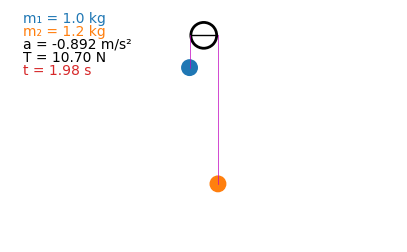

In [37]:
m1, m2 = 1.0, 1.20     # kg (make m1 > m2 so m1 goes down)
g = 9.81              # m/s²
L_rope = 1.0          # total rope length from pulley down to both masses
dt, t_max = 0.03, 2.0 # time step and total duration

# derived acceleration (downward for m1)
a = (m1 - m2) / (m1 + m2) * g
T = 2 * m1 * m2 * g / (m1 + m2)

# initial conditions: both start level at rest
s0 = L_rope / 2       # both equal lengths
v0 = 0.0

# geometry
pulley_y = 0.0
pulley_radius = 0.1
mass_radius = 0.06
x_offset = 0.11

fig, ax = plt.subplots(figsize=(5, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(1.6, -0.2)  # invert y so downward is positive visually
ax.set_aspect('equal')
ax.axis('off')

# pulley
pulley = plt.Circle((0, pulley_y), radius=pulley_radius, fill=False, lw=2)
ax.add_patch(pulley)
ax.plot([-pulley_radius, pulley_radius], [pulley_y, pulley_y], color='k', lw=1)

# rope and masses (initialized)
rope_left, = ax.plot([], [], 'm', lw=0.5)
rope_right, = ax.plot([], [], 'm', lw=0.5)
mass1 = plt.Circle((-x_offset, pulley_y + s0), mass_radius, color='C0')  # m1 left
mass2 = plt.Circle((+x_offset, pulley_y + L_rope - s0), mass_radius, color='C1')  # m2 right
ax.add_patch(mass1)
ax.add_patch(mass2)

ax.text(-1.4, -0.1, f"m₁ = {m1} kg", fontsize=10, color='C0')
ax.text(-1.4,  0.00, f"m₂ = {m2} kg", fontsize=10, color='C1')
ax.text(-1.4,  0.1, f"a = {a:.3f} m/s²", fontsize=10)
ax.text(-1.4,  0.2, f"T = {T:.2f} N", fontsize=10)
time_label = ax.text(-1.4,  0.3, "", fontsize=10, color='C3')

display(fig)

for t in np.arange(0, t_max, dt):
    # positions of each side
    s = s0 + 0.5 * a * t**2          # left mass m1 goes downward
    s_other = L_rope - s             # right side shorter (m2 goes up)
    
    # clamp to realistic range
    s = np.clip(s, 0.05, L_rope - 0.05)
    s_other = L_rope - s

    # update rope
    rope_left.set_data([-x_offset, -x_offset], [pulley_y, pulley_y + s + 0.2])
    rope_right.set_data([+x_offset, +x_offset], [pulley_y, pulley_y + s_other + 0.2])

    # update masses
    mass1.center = (-x_offset, pulley_y + s + 0.2)
    mass2.center = (+x_offset, pulley_y + s_other + 0.2)

    # update time label
    time_label.set_text(f"t = {t:.2f} s")

    # redraw frame
    clear_output(wait=True)
    display(fig)
    time.sleep(dt)

plt.close(fig)
